# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.path.append('/home/chayan/NeuroMDAVIS/')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utills import Datasets as ds
from utills import NeuroMDAVIS_TestSamples as nd

# Loading Data

In [2]:
x1, x2, y = ds.LoadData('kotliarov50k')

In [3]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1, x2, y, test_size=0.4, random_state=42)

# Applying NeuroMDAVIS

In [4]:
neuromdavis, low = nd.NeuroMDAVIS([x1_train, x2_train], dim=2, lambda_act= 0.0001, lambda_weight= 0.00001,
                                  num_neuron=[32, [128, 64]], bs=128, epoch=100, sd=0, verbose=1)
X_embedding_train = low.predict(np.eye(x1_train.shape[0]))
# saving the embedding
pd.DataFrame(X_embedding_train).to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/kotliarov50k_train.csv')

Epoch 1/100
245/245 [==============================] - 6s 16ms/step - loss: 1.2383 - modality1_output_loss: 0.2385 - modality2_output_loss: 0.9957
Epoch 2/100
245/245 [==============================] - 4s 16ms/step - loss: 1.1995 - modality1_output_loss: 0.2352 - modality2_output_loss: 0.9613
Epoch 3/100
245/245 [==============================] - 4s 16ms/step - loss: 1.0725 - modality1_output_loss: 0.2248 - modality2_output_loss: 0.8442
Epoch 4/100
245/245 [==============================] - 4s 16ms/step - loss: 0.9430 - modality1_output_loss: 0.2134 - modality2_output_loss: 0.7253
Epoch 5/100
245/245 [==============================] - 4s 16ms/step - loss: 0.8612 - modality1_output_loss: 0.2080 - modality2_output_loss: 0.6483
Epoch 6/100
245/245 [==============================] - 4s 16ms/step - loss: 0.8269 - modality1_output_loss: 0.2062 - modality2_output_loss: 0.6156
Epoch 7/100
245/245 [==============================] - 4s 15ms/step - loss: 0.8029 - modality1_output_loss: 0.2051 - m

# Predict 

In [5]:
X_embedding_test = nd.Predict([x1_test, x2_test], neuromdavis, dim=2, lambda_act= 0.0001, lambda_weight= 0.00001,
                              num_neuron=[32, [128, 64]], bs=128, epoch=100, sd=0, verbose=0)
# saving the embedding
pd.DataFrame(X_embedding_test).to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/kotliarov50k_test.csv')

652/652 [==============================] - 1s 2ms/step


# Plotting the results

In [6]:
c2=['blue', 'green', 'orange', 'red', 'yellow','pink', 'purple', 'aquamarine', 'gray', 'violet',
    'cyan','lime', 'royalblue' , 'skyblue', 'olive','tomato', 'saddlebrown', 'sienna', 'navy', 'darkgreen',
    'crimson', 'greenyellow','coral','burlywood','slategrey','blue', 'green']
c1_train=list(np.unique(y_train['cell_type']))
cols_train = map(lambda x: c2[c1_train.index(x)], y_train['cell_type'])
cs_train = [i for i in list(cols_train)]

c1_test=list(np.unique(y_test['cell_type']))
cols_test = map(lambda x: c2[c1_test.index(x)], y_test['cell_type'])
cs_test = [i for i in list(cols_test)]

Text(0.5, 1.0, 'Visualizing test data')

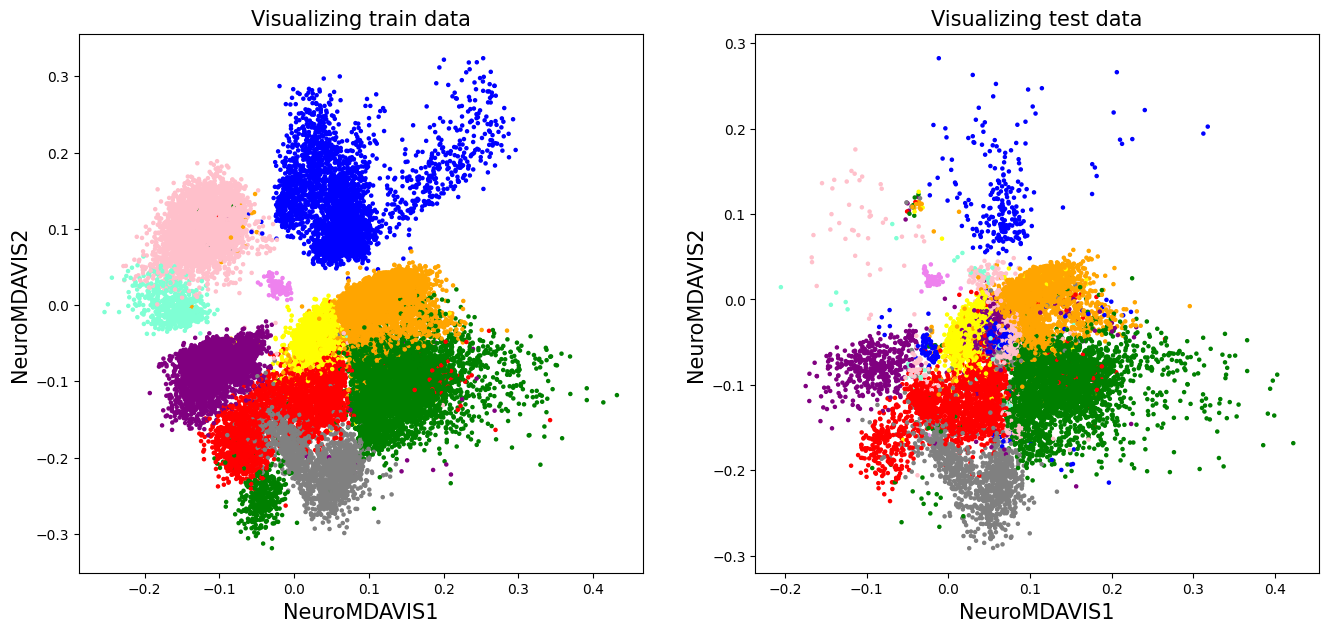

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(X_embedding_train[:,0],X_embedding_train[:,1],c=cs_train,s=5)
axs[0].set_xlabel("NeuroMDAVIS1", fontsize=15)
axs[0].set_ylabel("NeuroMDAVIS2", fontsize=15)
axs[0].set_title("Visualizing train data", fontsize=15)
axs[1].scatter(X_embedding_test[:,0],X_embedding_test[:,1],c=cs_test,s=5)
axs[1].set_xlabel("NeuroMDAVIS1", fontsize=15)
axs[1].set_ylabel("NeuroMDAVIS2", fontsize=15)
axs[1].set_title("Visualizing test data", fontsize=15)

In [8]:
# saving the train test labels
y_train.to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/kotliarov50k_train_labels.csv')
y_test.to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/kotliarov50k_test_labels.csv')